       This jupyter notebook is intended to analyze the data from coordination games between AI agents.

# Importing modules

In [1]:
import os
import json
import glob

import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from scipy.stats import mode, entropy

# Analyzing game scores

In [2]:
# Load all game files
def load_games(files):
    scores = []
    for file in files:
        with open(file, 'r') as f:
            data = json.load(f)
            final_score = data[-1]['score']
            scores.append(final_score)
    return np.array(scores)

In [3]:
chatgpt_scores  = load_games([f'data/chatgpt_flag_game_{i}.json'  for i in range(0, 100)])
deepseek_scores = load_games([f'data/deepseek_flag_game_{i}.json' for i in range(0, 100)])
mixed_scores    = load_games([f'data/mixed_flag_game_{i}.json'    for i in range(0, 100)])

In [4]:
print("ChatGPT vs ChatGPT:")
print(chatgpt_scores)
print(f"  Games: {len(chatgpt_scores)} | Median: {np.median(chatgpt_scores):.1f} | Total: {sum(chatgpt_scores)}")

print("\nDeepSeek vs DeepSeek:")
print(deepseek_scores)
print(f"  Games: {len(deepseek_scores)} | Median: {np.median(deepseek_scores):.1f} | Total: {sum(deepseek_scores)}")

print("\nMixed (GPT vs DeepSeek):")
print(mixed_scores)
print(f"  Games: {len(mixed_scores)} | Median: {np.median(mixed_scores):.1f} | Total: {sum(mixed_scores)}")

ChatGPT vs ChatGPT:
[27 27 11 10 27 14 26 13 27 21 16 25 27 14 27 27 27 27 17 27  8 23  9 27
 27 17 22 16 27 27 27 27 27 27 19 27 17 27 27 27 27 10 10 27 11 27  9 23
  3 17 27 12 17 27 27 21 14 11 15 27 18 27 27 27 11 22 27 27 27 27 20 20
 27 17 26 17 19 23  7 13 27 13 11 23 27 27 10  8 17 27 27 24 14  8 27 14
 27 22 13 24]
  Games: 100 | Median: 23.0 | Total: 2073

DeepSeek vs DeepSeek:
[29 29 29  4  8  5 11  7  7  4 29 29 10 29  6  9  4  8 29 10 10  7 29 29
 13  4  8 21 29 29 29 29 15 29  9  6  4 29 29 29 29 29  5 29 29  3 10 29
  6 29 29 29 29  8 29  7 29 12 12  5 29 13  1 29  9 26  7  6 14 29  7 29
 29 29  4  0 29 29 29  8  4  9 29 29  7 29  8 11 29 29 29 14  9 29 13  8
  8 14  6 29]
  Games: 100 | Median: 14.0 | Total: 1769

Mixed (GPT vs DeepSeek):
[ 3 11  7  6  1  2  7  8  8  1  7  5  6  6  8  4 10  1  6 10  5  8  8  7
  7  6  9  6  9  3  7  7  5  1 10  4 10 10  5 15  7  5  7  7  5  1  3  4
 10  7  5  9  3  6  5  7  5  7 10  3  8  1  2  8  3  2  7  6  6  9  3  7
  5  1  6  4  6 

/tmp/ipykernel_10162/2250262789.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


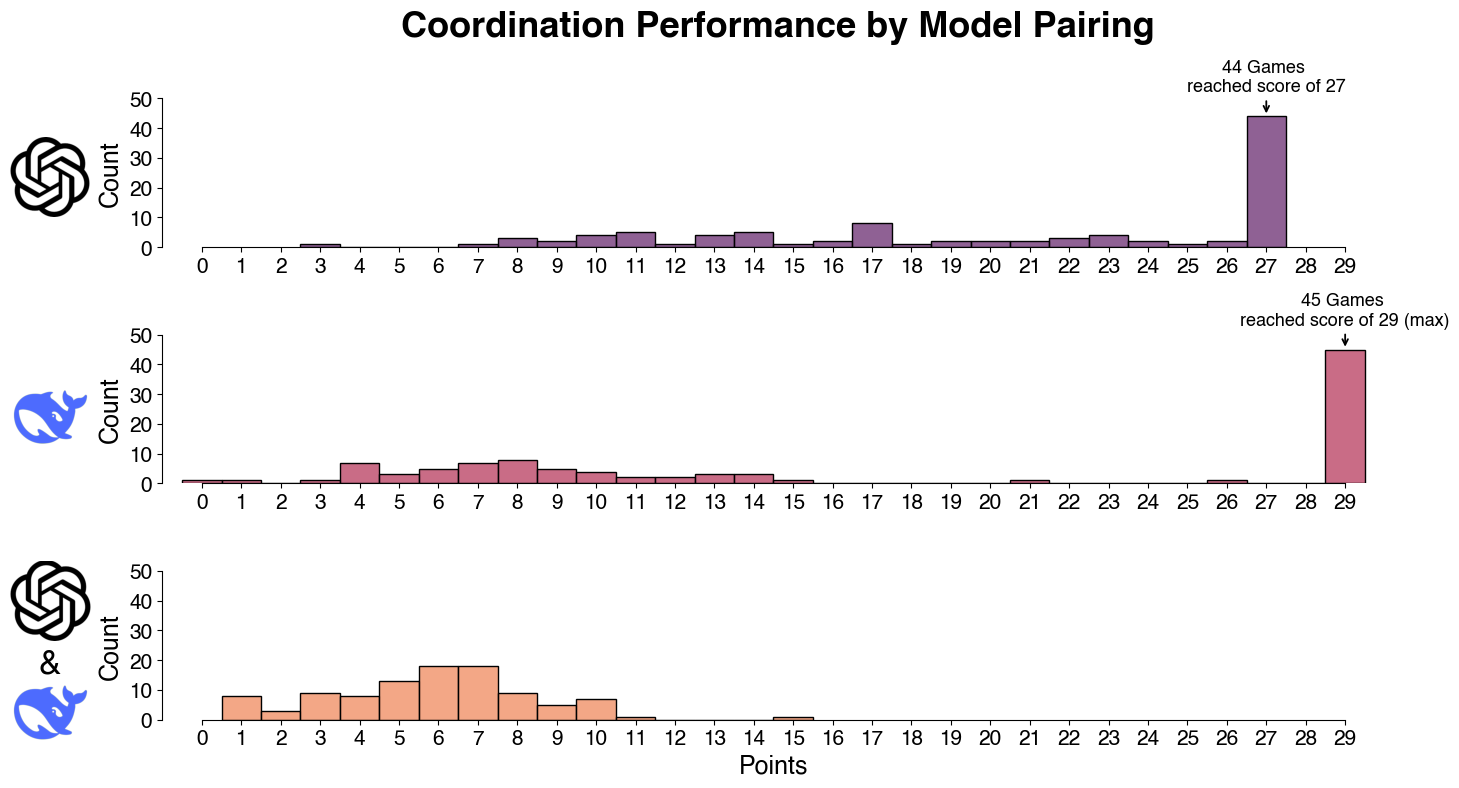

In [5]:
f, ax = plt.subplots(figsize=(14, 8),
                     nrows=3,
                     sharex=True, 
                     sharey=True
                    )

# ---- LARGE TOP TITLE ----
f.suptitle("Coordination Performance by Model Pairing",
           fontsize=26, fontweight="bold", y=0.98)

# First histogram
sns.histplot(chatgpt_scores, discrete=True, ax=ax[0], color='#6A2C70', stat='count')

# Second histogram
sns.histplot(deepseek_scores, discrete=True, ax=ax[1], color='#B83B5E', stat='count')

# Third histogram
sns.histplot(mixed_scores, discrete=True, ax=ax[2], color='#F08A5D', stat='count')

# ---- INSERT IMAGES AS TITLES ----
chat_img = plt.imread("images/chatgpt_icon.png")
deep_img = plt.imread("images/deepseek_icon.png")

# 1st plot image
new_ax1 = f.add_axes([-0.08, 0.72, 0.12, 0.10])
new_ax1.imshow(chat_img)
new_ax1.axis("off")

# 2nd plot image
new_ax2 = f.add_axes([-0.08, 0.42, 0.12, 0.10])
new_ax2.imshow(deep_img)
new_ax2.axis("off")

# 3rd plot → both images with VS between them
new_ax3a = f.add_axes([-0.07, 0.19, 0.10, 0.10])
new_ax3a.imshow(chat_img)
new_ax3a.axis("off")

new_ax3b = f.add_axes([-0.07, 0.05, 0.10, 0.10])
new_ax3b.imshow(deep_img)
new_ax3b.axis("off")

# VS text
f.text(-0.02, 0.15, "&", fontsize=24, fontweight="normal", ha="center")

# ---- ADD ARROWS + VALUES FOR MAX BARS ----
for idx, scores in [(0, chatgpt_scores), (1, deepseek_scores)]:
    values, counts = np.unique(scores, return_counts=True)
    xmax = values[np.argmax(counts)]
    ymax = counts.max()

    ax[idx].annotate(
        '', xy=(xmax, ymax), xytext=(xmax, ymax + 6),
        arrowprops=dict(arrowstyle='->', lw=1.3, color='black')
    )
    
    if idx == 1:
        ax[idx].text(
            xmax, ymax + 7,
            f"{ymax} Games \nreached score of {xmax} (max)",
            ha='center', va='bottom', fontsize=13
        )
    else:
        ax[idx].text(
            xmax, ymax + 7,
            f"{ymax} Games \nreached score of {xmax}",
            ha='center', va='bottom', fontsize=13
        )

# X-axis ticks (shared)
ax[2].set_xticks(np.arange(0, 30))
ax[2].set_yticks(np.arange(0, 60, 10))
ax[2].set_xlabel("Points", fontsize=18)

for i in range(3):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

    ax[i].tick_params(axis='both', labelsize=15)
    ax[i].set_ylabel('Count', fontsize=18)

    ax[i].tick_params(axis='x', which='both', labelbottom=True)
    ax[i].spines['bottom'].set_bounds(0, 29)

    ax[i].spines['left'].set_position(('axes', 0.03))

plt.tight_layout()
plt.savefig('images/llm_scores.png'
            , dpi=300
           , bbox_inches = "tight") 
plt.show()

In [6]:
# Mode
mode(chatgpt_scores), mode(deepseek_scores), mode(mixed_scores)

/tmp/ipykernel_10162/994510978.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(chatgpt_scores), mode(deepseek_scores), mode(mixed_scores)


(ModeResult(mode=array([27]), count=array([44])),
 ModeResult(mode=array([29]), count=array([45])),
 ModeResult(mode=array([6]), count=array([18])))

In [7]:
# Total points percentage (maximum 3000, how much did each LLM achieve?)
round(100*(np.sum(chatgpt_scores)/(29*100))), round(100*(np.sum(deepseek_scores)/(29*100))), round(100*(np.sum(mixed_scores)/(29*100)))

(71, 61, 20)

In [8]:
# Calculate entropy
counts_chatgpt,  _ = np.histogram(chatgpt_scores, bins=30)
counts_deepseek, _ = np.histogram(deepseek_scores, bins=30)
counts_mixed,    _ = np.histogram(mixed_scores, bins=30)

entropy_chatgpt  = entropy(counts_chatgpt)
entropy_deepseek = entropy(counts_deepseek)
entropy_mixed    = entropy(counts_mixed)

print(f"ChatGPT entropy: {entropy_chatgpt:.3f}")
print(f"DeepSeek entropy: {entropy_deepseek:.3f}")
print(f"Mixed entropy: {entropy_mixed:.3f}")

ChatGPT entropy: 2.284
DeepSeek entropy: 2.110
Mixed entropy: 2.253


# Coordination breaks

In [9]:


def analyze_coordination_breaks(data_folder='data', game_type='chatgpt', streak_length=3):
    """
    Analyze games where the coordination was broken after exactly x consecutive correct rounds.
    
    Parameters:
    - data_folder: folder containing JSON files
    - game_type: 'chatgpt', 'deepseek', or 'mixed'
    - streak_length: exact number of consecutive correct rounds before break
    
    Returns:
    - Dictionary with statistics and list of files where breaks occurred
    """
    
    # Get matching files
    coordination = os.path.join(data_folder, f'{game_type}_flag_game_*.json')
    files = sorted(glob.glob(coordination))
    
    if not files:
        print(f"No files found matching coordination: {coordination}")
        return
    
    print(f"\nAnalyzing {len(files)} {game_type} games...")
    print(f"Looking for breaks after exactly {streak_length} consecutive score increases\n")
    
    breaks = []  # [(filename, round_num, streak_before_break)]
    games_with_breaks = set()
    
    for file in files:
        with open(file, 'r') as f:
            data = json.load(f)
        
        # Track consecutive score increases
        consecutive_increases = 0
        
        for i in range(1, len(data)):
            prev_score = data[i-1]['score']
            curr_score = data[i]['score']
            
            if curr_score > prev_score:
                # Score increased - coordination was correct
                consecutive_increases += 1
            else:
                # Score didn't increase - coordination was broken
                if consecutive_increases == streak_length:
                    game_name = os.path.basename(file)
                    breaks.append((game_name, data[i]['round'], consecutive_increases))
                    games_with_breaks.add(game_name)
                
                # Reset counter
                consecutive_increases = 0
    
    # Print results
    print(f"RESULTS: {game_type.upper()} games")
    
    if not breaks:
        print(f"No breaks found after exactly {streak_length} consecutive increases.")
        return
    
    print(f"Unique games with this type of break: {len(games_with_breaks)}")
    print(f"Total break occurrences: {len(breaks)}\n")
    
    print(f"--- Broke after exactly {streak_length} consecutive increases ---")
    for game_name, round_num, streak in breaks:
        print(f"  • {game_name} (broke at round {round_num})")
    
    print(f"Break rate: {len(games_with_breaks)/len(files)*100:.1f}%")
    
    return {
        'total_games': len(files),
        'games_with_breaks': len(games_with_breaks),
        'break_rate': len(games_with_breaks) / len(files) * 100,
        'breaks': breaks,
        'files': sorted(list(games_with_breaks))
    }

In [10]:
analyze_coordination_breaks(data_folder='data', game_type='chatgpt', streak_length=10)


Analyzing 100 chatgpt games...
Looking for breaks after exactly 10 consecutive score increases

RESULTS: CHATGPT games
Unique games with this type of break: 2
Total break occurrences: 2

--- Broke after exactly 10 consecutive increases ---
  • chatgpt_flag_game_25.json (broke at round 26)
  • chatgpt_flag_game_88.json (broke at round 26)
Break rate: 2.0%


{'total_games': 100,
 'games_with_breaks': 2,
 'break_rate': 2.0,
 'breaks': [('chatgpt_flag_game_25.json', 26, 10),
  ('chatgpt_flag_game_88.json', 26, 10)],
 'files': ['chatgpt_flag_game_25.json', 'chatgpt_flag_game_88.json']}

In [11]:
analyze_coordination_breaks(data_folder='data', game_type='deepseek', streak_length=10)


Analyzing 100 deepseek games...
Looking for breaks after exactly 10 consecutive score increases

RESULTS: DEEPSEEK games
No breaks found after exactly 10 consecutive increases.


In [12]:
def count_breaks_by_streak(data_folder='data', game_type='chatgpt', min_streak=3, max_streak=20):
    """
    Count coordination breaks for different streak lengths.
    
    Parameters:
    - data_folder: folder containing JSON files
    - game_type: 'chatgpt', 'deepseek', or 'mixed'
    - min_streak: minimum streak length to analyze
    - max_streak: maximum streak length to analyze
    
    Returns:
    - streak_lengths: list of streak lengths [3, 4, 5, ..., 20]
    - break_counts: list of number of breaks for each streak length
    """
    
    # Get matching files
    coordination = os.path.join(data_folder, f'{game_type}_flag_game_*.json')
    files = sorted(glob.glob(coordination))
    
    if not files:
        print(f"No files found matching coordination: {coordination}")
        return None, None
    
    streak_lengths = list(range(min_streak, max_streak + 1))
    break_counts = []
    
    for target_streak in streak_lengths:
        breaks_for_this_streak = 0
        
        for file in files:
            with open(file, 'r') as f:
                data = json.load(f)
            
            # Track consecutive score increases
            consecutive_increases = 0
            
            for i in range(1, len(data)):
                prev_score = data[i-1]['score']
                curr_score = data[i]['score']
                
                if curr_score > prev_score:
                    # Score increased - coordination was correct
                    consecutive_increases += 1
                else:
                    # Score didn't increase - coordination was broken
                    if consecutive_increases == target_streak:
                        breaks_for_this_streak += 1
                    
                    # Reset counter
                    consecutive_increases = 0
        
        break_counts.append(breaks_for_this_streak)
    
    return streak_lengths, break_counts

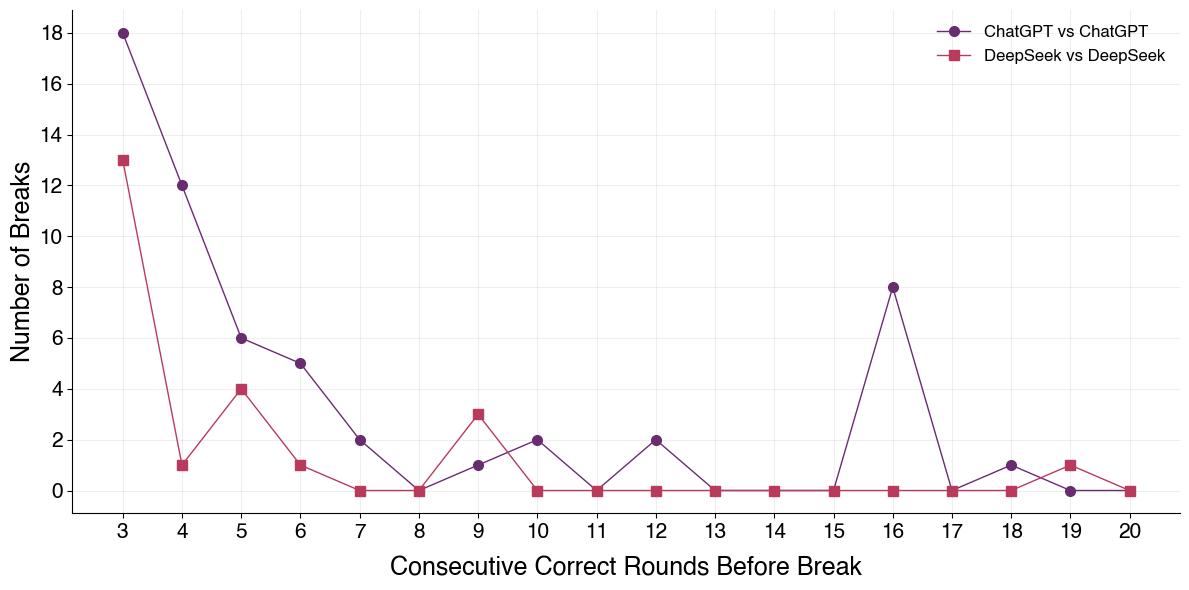

In [13]:
# Get the data
lengths_gpt, counts_gpt = count_breaks_by_streak(data_folder='data', game_type='chatgpt', min_streak=3, max_streak=20)
lengths_ds, counts_ds   = count_breaks_by_streak(data_folder='data', game_type='deepseek', min_streak=3, max_streak=20)

# Create the plot

f, ax = plt.subplots(figsize=(12, 6))

ax.plot(lengths_gpt, counts_gpt, marker='o', linewidth=1, markersize=7,
         color='#6A2C70', label='ChatGPT vs ChatGPT', alpha=1)
ax.plot(lengths_ds, counts_ds, marker='s', linewidth=1,  markersize=7,
         color='#B83B5E', label='DeepSeek vs DeepSeek', alpha=1)

ax.set_xlabel('Consecutive Correct Rounds Before Break', fontsize=18, labelpad = 10)
ax.set_ylabel('Number of Breaks', fontsize=18)

ax.legend(fontsize=12, frameon=False, shadow=False)
ax.set_xticks(lengths_gpt)

ax.set_yticks(np.arange(0, 20, 2))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(True, color = '#606060', alpha =.1) # or simply plt.grid()

ax.tick_params(labelsize = 15)

plt.tight_layout()
plt.savefig('images/coordination_breaks.png', 
            dpi=300,
            bbox_inches='tight')
plt.show()